<Axes: title={'center': 'networks/Net0.inp'}>

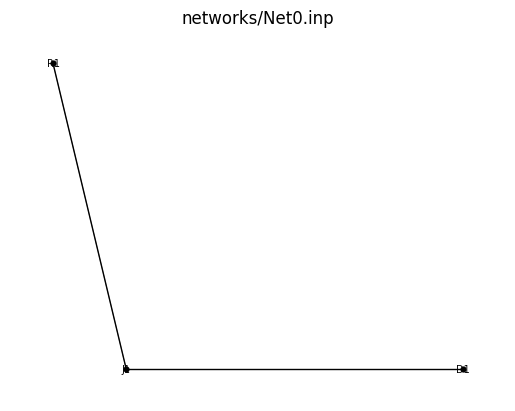

In [1]:

import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net0.inp'
wn = wntr.network.WaterNetworkModel(inp_file)
wn2 = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


0 <quantum_newton_raphson.splu_solver.SPLU_SOLVER object at 0x7cb601015910> [22.381  0.049  0.049 29.834] 29.998187665695937 1e-06
1 <quantum_newton_raphson.splu_solver.SPLU_SOLVER object at 0x7cb601015910> [-7.412e+01  2.450e-02  2.450e-02  1.306e+01] 28.978875578530186 1e-06
2 <quantum_newton_raphson.splu_solver.SPLU_SOLVER object at 0x7cb601015910> [-2.343e+01  0.000e+00 -1.388e-17 -5.112e-01] 22.91430172536255 1e-06
Success [ 0.000e+00  0.000e+00 -1.421e-14  0.000e+00]
Success [ 0.000e+00  0.000e+00 -1.421e-14  0.000e+00]


/home/nico/miniconda3/envs/vitens/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


<Axes: title={'center': 'Pressure at 5 hours'}>

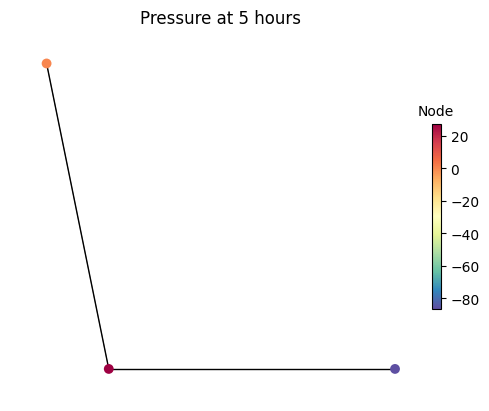

In [2]:
sim2 = wntr_quantum.sim.QuantumWNTRSimulator(wn2)
results2 = sim2.run_sim()
# Plot results on the network
pressure_at_5hr = results2.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [3]:
# Simulate hydraulics
from dwave.samplers import SimulatedAnnealingSampler
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER
from quantum_newton_raphson.splu_solver import SPLU_SOLVER
from quantum_newton_raphson.splu_solver import QUBOReorder

# instantiate the quantum reorder solver using a DWAVE sampler
reorder_solver = QUBOReorder(
    sampler = SimulatedAnnealingSampler()
)

# define the linear solver with the reorder solver
linear_solver = SPLU_SOLVER(reorder_solver=reorder_solver)
linear_solver = QUBO_SOLVER(num_qbits=11, num_reads=100)
sim = wntr_quantum.sim.QuantumWNTRSimulator(wn, linear_solver=linear_solver)
results = sim.run_sim(linear_solver=linear_solver)

50
0 <quantum_newton_raphson.qubo_solver.QUBO_SOLVER object at 0x7cb5fe549400> [37.439 -0.049 -0.049 30.156] 29.998187665695937 1e-06
[187.19452590420332, -0.24437927663734116, -0.24437927663734116, 150.78201368523946]
1 <quantum_newton_raphson.qubo_solver.QUBO_SOLVER object at 0x7cb5fe549400> [-4.721e+01  1.070e-01  3.703e-02  1.032e+01] 24.33529757099481 1e-06
[-236.05174820764643, 0.5351022284141195, 0.18513581563434936, 51.58719920804863]
2 <quantum_newton_raphson.qubo_solver.QUBO_SOLVER object at 0x7cb5fe549400> [ 4.799e+01 -8.892e-03 -9.592e-03  1.241e+01] 21.773171290935537 1e-06
[239.974406780012, -0.04446108447233642, -0.04795795810664964, 62.02566473694997]
3 <quantum_newton_raphson.qubo_solver.QUBO_SOLVER object at 0x7cb5fe549400> [-9.923e+01  1.964e-02  4.594e-02 -3.032e-01] 3.8721172088082554 1e-06
[-496.1347706155674, 0.0982229236632261, 0.22971064977769623, -1.5157787081366072]
4 <quantum_newton_raphson.qubo_solver.QUBO_SOLVER object at 0x7cb5fe549400> [-2.333e+02  9.496

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

KeyError: 0

In [ ]:
import numpy as np
A = np.random.rand(4,4)
x = np.random.rand(4)
b = np.random.rand(4)

def jacobi_iteration(A, b, x, max_iter=100, eps=1e-3):
    """Jacobi iteration to refine the solution.

    Args:
        A (_type_): _description_
        b (_type_): _description_
        x (_type_): _description_
        max_iter (int, optional): _description_. Defaults to 100.
        eps (_type_, optional): _description_. Defaults to 1E-3.
    """
    D = np.diag(A)
    D = np.array([d if d != 0 else 1 for d in D])
    R = A - np.diagflat(D)
    print(A.shape, b.shape, x.shape)
    residue = np.linalg.norm(A @ x - b)
    niter = 0
    while residue > eps:
        x = (b - R @ x) / D
        print(A.shape, b.shape, x.shape)
        residue = np.linalg.norm(A @ x - b)
        niter += 1
        if niter > max_iter:
            break

    return x

In [ ]:
jacobi_iteration(A,b,x)

(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4,)
(4, 4) (4,) (4

array([-4.569e+80, -2.306e+81, -5.784e+80, -2.424e+80])